In [9]:
import pandas as pd
import geopandas as gpd

In [10]:
df = pd.read_csv('UTSEUS-MOBIKE-shanghai_full.csv', index_col=0)
df.head()

C:\Users\sebr\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
orderid,,,,,,,,,
1,324731,7541,2016-08-28 00:00,121.490,31.280,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
10,93155,12616,2016-08-28 00:00,121.436,31.320,2016-08-28 00:12,121.444,31.310,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.460,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


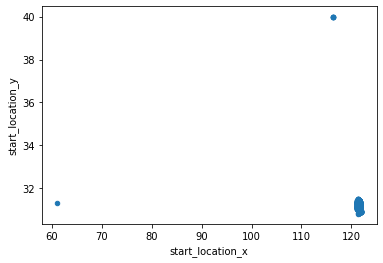

In [11]:
%matplotlib inline
df.plot.scatter(x='start_location_x', y='start_location_y');

In [16]:
df_clean = df[(df['start_location_x']>121.10157) & (df['start_location_x']<121.804611) & (df['start_location_y']>30.975) & (df['start_location_y']<31.514955)];

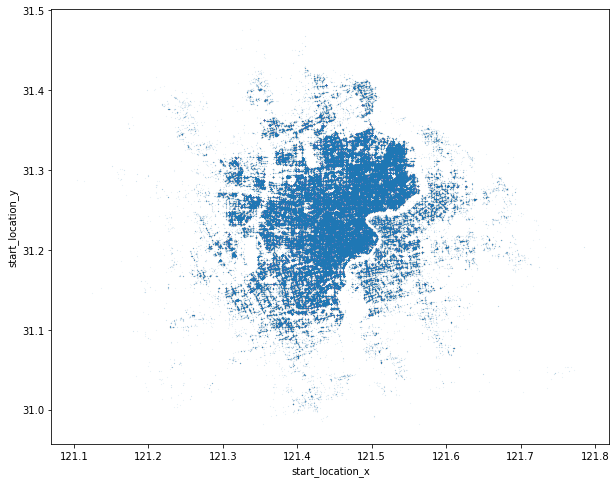

In [114]:
df_clean.plot.scatter(x='start_location_x', y='start_location_y',s=0.001,figsize=(10,8));

In [111]:
df_end_time = df_clean['end_time']
df_start_time = df_clean['start_time']

In [112]:
df_clean['using_time'] = pd.to_datetime(df_end_time) - pd.to_datetime(df_start_time)
df_clean['using_time_seconds']= time.dt.total_seconds()

C:\Users\sebr\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sebr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [128]:
"""
from osgeo import osr,ogr

old_crs = osr.SpatialReference()
old_crs.ImportFromEPSG(4326)
new_crs = osr.SpatialReference()
new_crs.ImportFromEPSG(4479)
transform = osr.CoordinateTransformation(old_crs,new_crs)

def getNewLongitude(xy):
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(xy[0], xy[1])
    point.Transform(transform)
    return point.GetX()

def getNewLatitude(xy):
    point = ogr.Geometry(ogr.wkbPoint)
    point.AddPoint(xy[0], xy[1])
    point.Transform(transform)
    return point.GetY()
"""

In [132]:
import os
os.environ['GDAL_DATA'] = r'/path/to/dir/'

In [133]:
df['start_lon'] = df[['start_location_x','start_location_y']].apply(getNewLongitude,axis=1)
df['start_lat'] = df[['start_location_x','start_location_y']].apply(getNewLatitude,axis=1)
df['end_lon'] = df[['end_location_x','end_location_y']].apply(getNewLongitude,axis=1)
df['end_lat'] = df[['end_location_x','end_location_y']].apply(getNewLongitude,axis=1)
df.head()

TypeError: ("in method 'Geometry_Transform', argument 2 of type 'OSRCoordinateTransformationShadow *'", 'occurred at index 1')

In [117]:
df_start_loc_x = df_clean['start_location_x']
df_start_loc_y = df_clean['start_location_y']
df_end_loc_x = df_clean['end_location_x']
df_end_loc_y = df_clean['end_location_y']

In [118]:
df_start_loc_x

orderid
1          121.490
6          121.462
8          121.416
10         121.436
11         121.459
13         121.353
15         121.441
16         121.426
17         121.524
20         121.442
21         121.381
22         121.407
23         121.479
24         121.483
28         121.478
29         121.488
31         121.304
33         121.414
34         121.423
35         121.467
36         121.378
37         121.545
38         121.517
41         121.483
42         121.406
44         121.486
45         121.538
49         121.420
50         121.486
51         121.528
            ...   
1807814    121.451
1807815    121.462
1807817    121.498
1807818    121.402
1807821    121.415
1807824    121.429
1807825    121.474
1807827    121.497
1807829    121.435
1807830    121.450
1807831    121.532
1807838    121.515
1807840    121.410
1807841    121.445
1807846    121.473
1807848    121.297
1807849    121.452
1807850    121.446
1807851    121.405
1807852    121.403
1807853    121.481
1807